In [1]:
import pandas as pd

In [2]:
import h5py 
import numpy as np
def import_tfmodisco_motifs(tfm_results_path, trim=True, only_pos=True):
    """
    Imports the PFMs to into a dictionary, mapping `(x, y)` to the PFM,
    where `x` is the metacluster index and `y` is the pattern index.
    Arguments:
        `tfm_results_path`: path to HDF5 containing TF-MoDISco results
        `out_dir`: where to save motifs
        `trim`: if True, trim the motif flanks based on information content
        `only_pos`: if True, only return motifs with positive contributions
    Returns the dictionary of PFMs.
    """ 
    pfms = {}
    with h5py.File(tfm_results_path, "r") as f:
        metaclusters = f["metacluster_idx_to_submetacluster_results"]
        num_metaclusters = len(metaclusters.keys())
        for metacluster_i, metacluster_key in enumerate(metaclusters.keys()):
            metacluster = metaclusters[metacluster_key]
            print(len(metacluster["seqlets"].value))
            if "patterns" not in metacluster["seqlets_to_patterns_result"]:
                continue
            patterns = metacluster["seqlets_to_patterns_result"]["patterns"]
            num_patterns = len(patterns["all_pattern_names"][:])
            for pattern_i, pattern_name in enumerate(patterns["all_pattern_names"][:]):
                pattern_name = pattern_name
                pattern = patterns[pattern_name]
                if metacluster_i==0:
                    key = "pos_patterns.pattern_"+str(pattern_i)
                if metacluster_i==1:
                    key = "neg_patterns.pattern_"+str(pattern_i)                
                
                if key not in pfms:
                    pfms[key] = []

                for seqlet in pattern["seqlets_and_alnmts"]["seqlets"]:
                    pfms[key].append(seqlet)
               
    return pfms

In [3]:
dttype = 'ATAC'
mode = "counts"
celltype="H1ESC"
dttype1="ATAC_PE"
tfm_results_path = '/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/'+dttype+'/'+celltype+'/merge_folds_new/'+mode+'/modisco_old_format.h5'

pfms = import_tfmodisco_motifs(tfm_results_path)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.


156671
148


In [4]:
htmld="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/"+dttype+'/'+celltype+"/merge_folds_new/counts/motifs.html"
df = pd.read_html(htmld)
tomtom = df[0]
tomtom

,pattern,num_seqlets,modisco_cwm_fwd,modisco_cwm_rev,match0,qval0,match0_logo,match1,qval1,match1_logo,match2,qval2,match2_logo
0,pos_patterns.pattern_0,39123,NaN,NaN,CTCF_MA0139.1,1.999670e-14,NaN,CTCF_HUMAN.H11MO.0.A,2.640200e-09,NaN,CTCF_MOUSE.H11MO.0.A,7.409620e-09,NaN
1,pos_patterns.pattern_1,29163,NaN,NaN,PO5F1_HUMAN.H11MO.0.A,6.831460e-08,NaN,PO5F1_MOUSE.H11MO.0.A,6.831460e-08,NaN,NANOG_HUMAN.H11MO.0.A,9.559130e-08,NaN
2,pos_patterns.pattern_2,22161,NaN,NaN,ZIC3_HUMAN.H11MO.0.B,5.488530e-06,NaN,ZIC3_MOUSE.H11MO.0.A,5.488530e-06,NaN,ZIC2_MOUSE.H11MO.0.C,2.062000e-04,NaN
3,pos_patterns.pattern_3,12836,NaN,NaN,SP3_HUMAN.H11MO.0.B,3.009860e-07,NaN,SP3_MOUSE.H11MO.0.B,3.009860e-07,NaN,SP1_HUMAN.H11MO.0.A,3.009860e-07,NaN
4,pos_patterns.pattern_4,12068,NaN,NaN,NANOG_MOUSE.H11MO.0.A,2.923360e-11,NaN,SOX2_MOUSE.H11MO.0.A,1.717660e-10,NaN,PO5F1_MOUSE.H11MO.0.A,3.376660e-09,NaN
5,pos_patterns.pattern_5,9820,NaN,NaN,TEAD1_HUMAN.H11MO.0.A,4.605910e-04,NaN,TEAD3_MA0808.1,1.784090e-03,NaN,TEAD3_TEA_2,1.784090e-03,NaN
6,pos_patterns.pattern_6,8121,NaN,NaN,SOX2_MOUSE.H11MO.0.A,1.943590e-03,NaN,SOX3_HUMAN.H11MO.0.B,9.312650e-03,NaN,Sox3_MA0514.1,9.312650e-03,NaN
7,pos_patterns.pattern_7,3528,NaN,NaN,NFYC_HUMAN.H11MO.0.A,2.446400e-04,NaN,NFYB_HUMAN.H11MO.0.A,2.446400e-04,NaN,NFYB_MOUSE.H11MO.0.A,2.446400e-04,NaN
8,pos_patterns.pattern_8,3517,NaN,NaN,Rfx1_MA0509.1,5.937060e-08,NaN,RFX3_MA0798.1,5.937060e-08,NaN,RFX3_RFX_1,5.937060e-08,NaN
9,pos_patterns.pattern_9,2918,NaN,NaN,SIX1_HUMAN.H11MO.0.A,5.004280e-09,NaN,SIX2_MOUSE.H11MO.0.A,2.928750e-08,NaN,SIX1_MA1118.1,2.882120e-07,NaN


In [5]:
bed="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/folds/"+dttype+'/'+celltype+"/merge_folds_new/in_peaks.interpreted_regions.bed"
bed = pd.read_csv(bed, sep="\t", header=None)
bed.head()
print(bed.shape)

(236571, 11)


In [6]:
lists=[]
for key in pfms:
    print(key)
    if key in tomtom["pattern"].values:
        match_name = tomtom[tomtom["pattern"]==key]["match0"]
        keyd = key.replace("pos_patterns.pattern","0").replace("neg_patterns.pattern","1")+"_"+match_name
        keyd = keyd.values[0]
        #print(keyd.values[0])
        for seqlet in pfms[key]:
            vals = seqlet.split(",")
            peak_id = int(vals[0].split(":")[1])
            ss = vals[1].split(":")[1]
            ee = vals[2].split(":")[1]
            blist = [bed.loc[peak_id,0], bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ss), bed.loc[peak_id,1]+bed.loc[peak_id,9]-250+int(ee), keyd]
            #print(blist)
            lists.append(blist)
    else:
        print(key)
            

pos_patterns.pattern_0
pos_patterns.pattern_1
pos_patterns.pattern_2
pos_patterns.pattern_3
pos_patterns.pattern_4
pos_patterns.pattern_5
pos_patterns.pattern_6
pos_patterns.pattern_7
pos_patterns.pattern_8
pos_patterns.pattern_9
pos_patterns.pattern_10
pos_patterns.pattern_11
pos_patterns.pattern_12
pos_patterns.pattern_13
pos_patterns.pattern_14
pos_patterns.pattern_15
pos_patterns.pattern_16
pos_patterns.pattern_17
pos_patterns.pattern_18
pos_patterns.pattern_19
pos_patterns.pattern_20
pos_patterns.pattern_21
pos_patterns.pattern_22
pos_patterns.pattern_23
pos_patterns.pattern_24
pos_patterns.pattern_25
pos_patterns.pattern_26
pos_patterns.pattern_27
pos_patterns.pattern_28
pos_patterns.pattern_29
pos_patterns.pattern_30
pos_patterns.pattern_31
pos_patterns.pattern_32
pos_patterns.pattern_33
pos_patterns.pattern_34
pos_patterns.pattern_35
pos_patterns.pattern_36
pos_patterns.pattern_37
pos_patterns.pattern_38
pos_patterns.pattern_39
pos_patterns.pattern_40
pos_patterns.pattern_41
po

In [7]:
print(len(lists))
data = pd.DataFrame(lists)
print(data.head())

156819
       0         1         2                  3
0  chr14  76647877  76647907  0_0_CTCF_MA0139.1
1  chr12  50075341  50075371  0_0_CTCF_MA0139.1
2   chr9  93109337  93109367  0_0_CTCF_MA0139.1
3   chr8   7424437   7424467  0_0_CTCF_MA0139.1
4   chr2  69565499  69565529  0_0_CTCF_MA0139.1


In [8]:

# intersect tf_chip bed with merged peaks and resd it in


In [9]:
chip_regions = pd.read_csv("chip_in_bed.bed", sep="\t", header=None)


In [10]:
chip_regions.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,chr1,778548,778568,PHF8,1000,.,50.14870,-1.0,4.63989,180,chr1,778378,778717
1,chr1,778572,778592,YY1,1000,.,60.03318,-1.0,4.60725,168,chr1,778414,778750
2,chr1,778598,778618,POLR2A,1000,.,70.09032,-1.0,3.09851,235,chr1,778373,778843
3,chr1,778599,778619,POLR2A,1000,.,146.46284,-1.0,4.06204,240,chr1,778369,778901
4,chr1,778609,778629,KDM5A,1000,.,79.83481,-1.0,3.98762,131,chr1,778488,778757


In [11]:
modisco_hits = data
modisco_hits.head()

,0,1,2,3
0,chr14,76647877,76647907,0_0_CTCF_MA0139.1
1,chr12,50075341,50075371,0_0_CTCF_MA0139.1
2,chr9,93109337,93109367,0_0_CTCF_MA0139.1
3,chr8,7424437,7424467,0_0_CTCF_MA0139.1
4,chr2,69565499,69565529,0_0_CTCF_MA0139.1


In [12]:
#chip_intersect = pd.read_csv("/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/temp/in_chip_seq_peaks_full.bed", sep="\t", header=None)


In [13]:
#chip_intersect = chip_intersect.drop_duplicates()
#chip_intersect.head()


In [14]:
#motif_chip_count_matrix.shape
peaks = pd.read_csv("merged.bed",header=None,sep="\t")
total_bases = np.sum(peaks[2]-peaks[1])

total_bases

85894116

In [15]:
import scipy
import scipy.stats
import subprocess
import os
def compute_cooccurrence_pvals(modisco,chip,total_bases):
    """
    Given the number of motif hits in each peak, computes p-value of
    co-occurrence for each pair of motifs, including self pairs.
    Returns an M x N array of p-values for the M motifs.
    """
    
    motifs_to_chip = np.zeros((len(set(modisco[3])),len(set(chip[3]))))
    unique_motifs = list(set(modisco[3]))
    uniq_tfs = list(set(chip[3]))
    print(unique_motifs)
    
    unique_motifs = [i for i in unique_motifs if i is not np.nan]

    unique_motifs1 = [i for i in unique_motifs if int(i.split("_")[0]) == 0 ]
    unique_motifs2  = [i for i in unique_motifs if int(i.split("_")[0]) == 1]
    indxs1 = np.argsort([int(i.split("_")[1]) for i in unique_motifs1])
    indxs2 = np.argsort([int(i.split("_")[1]) for i in unique_motifs2])
    unique_motifs = list(np.array(unique_motifs1)[indxs1]) +  list(np.array(unique_motifs2)[indxs2])

    num_motifs = len(unique_motifs)
    num_chip = len(uniq_tfs)
    pvals = np.ones((num_motifs, num_chip))
    odds = np.ones((num_motifs, num_chip))

    print(num_motifs,num_chip)
    
    def merge_file(temp3,out_name):
        temp3.to_csv(out_name+".bed",sep="\t",header=False,index=False)
        
        with open(out_name+"_sorted.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "sort","-i",out_name+".bed"], stdout=f)
            proc.wait()
            
        with open(out_name+"_merged.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "merge","-i",out_name+"_sorted.bed"], stdout=f)
            proc.wait()
            
        temp3 = pd.read_csv(out_name+"_merged.bed",sep="\t",header=None)
        #print(temp3.shape)
        return temp3

    def intersect_file(out_name):
        
        with open(out_name+"_intersect.bed", "w") as f:
            proc = subprocess.Popen(["bedtools", "intersect","-a","temp_merged.bed", "-b", "temp1_merged.bed", "-wo"], stdout=f)
            proc.wait()
            
        if os.stat(out_name+"_intersect.bed").st_size == 0:
            return 0
        else:
            temp3 = pd.read_csv(out_name+"_intersect.bed",sep="\t",header=None)
            return np.sum(temp3[6])
        
    # Significance is based on a Fisher's exact test. If the motifs were
    # present in peaks randomly, we'd independence of occurrence.
    # For self-co-occurrence, the null model is not independence, but
    # collisions
    dicts = {}
    for i in range(num_motifs):
        temp3  = modisco[modisco[3]==unique_motifs[i]]
        temp3 =  merge_file(temp3,"temp")
        Xin = np.sum(temp3[2]-temp3[1])
        print(i)
        #print(Xin)

        for j in range(num_chip):
            
            #if uniq_tfs[j] not in dicts:
            temp3 = chip[chip[3]==uniq_tfs[j]]
            temp3 = merge_file(temp3,"temp1")
            Yin =  np.sum(temp3[2]-temp3[1])
                #print(Yin)
            dicts[uniq_tfs[j]] = Yin
            
            out_file = intersect_file("temp3")
            motif_chip=out_file
            #print(motif_chip)
        
            no_chip_only_motif = Xin - motif_chip
            no_motif_only_chip = dicts[uniq_tfs[j]] - motif_chip

            no_chip_no_motif = total_bases - no_chip_only_motif - no_motif_only_chip - motif_chip 

            # Contingency table (universe is set of all possible combination):
            #              no chip 1  |  has chip 1
            # no motif 2       A       |      B
            # -------------------------+--------------
            # has motif 2      C       |      D
            # The Fisher's exact test evaluates the significance of the
            # association between the two classifications
            cont_table = np.array([
                [
                    no_chip_no_motif,
                    no_motif_only_chip
                ],
                [
                   no_chip_only_motif,
                 motif_chip
                ]
            ])
            #print(uniq_tfs[j],cont_table)
            try:
                test_o = scipy.stats.fisher_exact(
                    cont_table, alternative="greater"
                )
                pval = test_o[1]
                odd = test_o[0]
            except:
                print(cont_table)
                print(motif_chip)
                print(Xin)
                print(Yin)
                print(uniq_tfs[j])
                print(unique_motifs[i])


            pvals[i, j] = pval
            odds[i,j] = odd
            
    return pvals, odds, unique_motifs,uniq_tfs 

motif_chip_pval_matrix, odds_ratio,unique_motifs,uniq_tfs  = compute_cooccurrence_pvals(modisco_hits,chip_regions,total_bases)



['0_24_ETV6_ETS_1', '0_2_ZIC3_HUMAN.H11MO.0.B', '0_17_MXI1_HUMAN.H11MO.0.A', '0_18_Gabpa_MA0062.2', '1_3_SOX15_MA1152.1', '0_25_ZBED1_MA0749.1', '0_34_ZN547_HUMAN.H11MO.0.C', '0_42_Sox3_MA0514.1', '1_1_MITF_MA0620.2', '0_30_ZIC2_MOUSE.H11MO.0.C', '0_4_NANOG_MOUSE.H11MO.0.A', '0_22_EBF1_EBF_1', '0_19_COE1_HUMAN.H11MO.0.A', '0_0_CTCF_MA0139.1', '1_2_POU3F1_POU_2', '0_9_SIX1_HUMAN.H11MO.0.A', '0_13_NRF1_MOUSE.H11MO.0.A', '0_43_TEAD3_MA0808.1', '0_33_E2F4_MOUSE.H11MO.0.A', '0_8_Rfx1_MA0509.1', '0_5_TEAD1_HUMAN.H11MO.0.A', '0_36_Pou5f1+Sox2_MA0142.1', '1_0_ZN554_HUMAN.H11MO.0.C', '0_3_SP3_HUMAN.H11MO.0.B', '0_26_POU2F2_POU_2', '0_14_Rfx2.mouse_RFX_2', '0_16_CTCF_MA0139.1', '0_11_ZNF76_HUMAN.H11MO.0.C', '0_44_TEAD3_MA0808.1', '0_41_PO5F1_HUMAN.H11MO.0.A', '0_27_NRF1_NRF_1', '0_40_STA5B_HUMAN.H11MO.0.A', '0_7_NFYC_HUMAN.H11MO.0.A', '0_37_FOXB1_MA0845.1', '0_1_PO5F1_HUMAN.H11MO.0.A', '0_6_SOX2_MOUSE.H11MO.0.A', '0_31_Pou5f1+Sox2_MA0142.1', '0_23_SOX2_HUMAN.H11MO.0.A', '0_39_SP1_HUMAN.H11MO.0.A

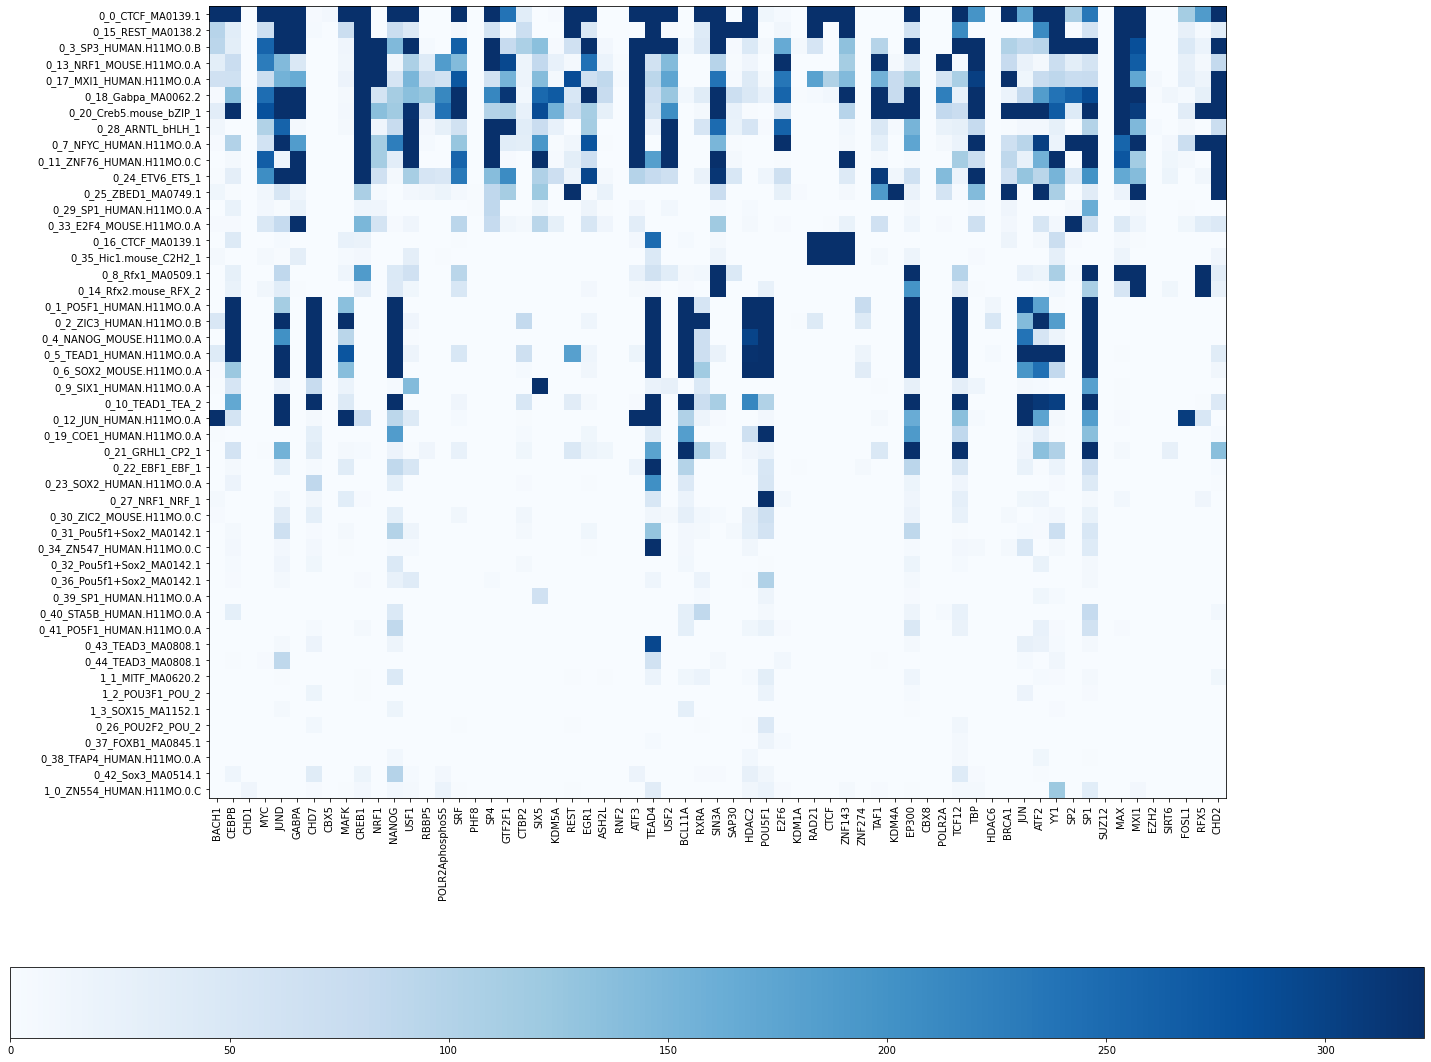

In [16]:
import sklearn.cluster
import scipy.cluster.hierarchy
import scipy.stats

def cluster_matrix_indices(matrix, num_clusters):
    """
    Clusters matrix using k-means. Always clusters on the first
    axis. Returns the indices needed to optimally order the matrix
    by clusters.
    """
    if len(matrix) == 1:
        # Don't cluster at all
        return np.array([0])

    num_clusters = min(num_clusters, len(matrix))
    
    # Perform k-means clustering
    kmeans = sklearn.cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(matrix)

    # Perform hierarchical clustering on the cluster centers to determine optimal ordering
    kmeans_centers = kmeans.cluster_centers_
    cluster_order = scipy.cluster.hierarchy.leaves_list(
        scipy.cluster.hierarchy.optimal_leaf_ordering(
            scipy.cluster.hierarchy.linkage(kmeans_centers, method="centroid"), kmeans_centers
        )
    )

    # Order the peaks so that the cluster assignments follow the optimal ordering
    cluster_inds = []
    for cluster_id in cluster_order:
        cluster_inds.append(np.where(cluster_assignments == cluster_id)[0])
    cluster_inds = np.concatenate(cluster_inds)
    return cluster_inds

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Create a figure with the right dimensions
fig, ax = plt.subplots(figsize=(20, 16))


 
inds = cluster_matrix_indices(motif_chip_pval_matrix,10)

zero_mask = motif_chip_pval_matrix == 0
min_val = np.min(motif_chip_pval_matrix[~zero_mask])
motif_chip_pval_matrix[zero_mask] = min_val
logpval_matrix = -np.log10(motif_chip_pval_matrix)
 

hmap = ax.imshow(logpval_matrix[inds], cmap="Blues")


# Set axes on heatmap
ax.set_yticks(np.arange(len(unique_motifs)))
ax.set_yticklabels(np.array(unique_motifs)[inds])
ax.set_xticks(np.arange(len(uniq_tfs)))
ax.set_xticklabels(np.array(uniq_tfs), rotation=90)

fig.colorbar(hmap, orientation="horizontal")

fig.tight_layout()
    

plt.show()

In [17]:

from statsmodels.sandbox.stats.multicomp import multipletests



0_0_CTCF_MA0139.1
['CTCF' 'RAD21' 'ZNF143' 'GABPA' 'YY1']
0_1_PO5F1_HUMAN.H11MO.0.A
['POU5F1' 'BCL11A' 'NANOG' 'ZNF274' 'CHD7']
0_2_ZIC3_HUMAN.H11MO.0.B
['BCL11A' 'NANOG' 'POU5F1' 'TCF12' 'ZNF274']
0_3_SP3_HUMAN.H11MO.0.B
['SP1' 'SP2' 'EGR1' 'CHD2' 'SP4']
0_4_NANOG_MOUSE.H11MO.0.A
['POU5F1' 'BCL11A' 'NANOG' 'CHD7' 'EP300']
0_5_TEAD1_HUMAN.H11MO.0.A
['TEAD4' 'JUN' 'BCL11A' 'SP1' 'EP300']
0_6_SOX2_MOUSE.H11MO.0.A
['BCL11A' 'NANOG' 'ZNF274' 'CHD7' 'POU5F1']
0_7_NFYC_HUMAN.H11MO.0.A
['SP2' 'CHD2' 'RFX5' 'SP1' 'USF2']
0_8_Rfx1_MA0509.1
['RFX5' 'MXI1' 'EP300' 'SIN3A' 'MAX']
0_9_SIX1_HUMAN.H11MO.0.A
['SIX5' 'RXRA' 'CHD7' 'SP1' 'USF1']
0_10_TEAD1_TEA_2
['TEAD4' 'BCL11A' 'SP1' 'JUN' 'EP300']
0_11_ZNF76_HUMAN.H11MO.0.C
['SIX5' 'ZNF143' 'ATF3' 'CREB1' 'CHD2']
0_12_JUN_HUMAN.H11MO.0.A
['JUN' 'JUND' 'MAFK' 'BACH1' 'FOSL1']
0_13_NRF1_MOUSE.H11MO.0.A
['NRF1' 'ATF3' 'GTF2F1' 'SP4' 'BRCA1']
0_14_Rfx2.mouse_RFX_2
['RFX5' 'MXI1' 'SIRT6' 'EP300' 'SRF']
0_15_REST_MA0138.2
['REST' 'ZNF143' 'SIN3A' 'MXI1' 'S

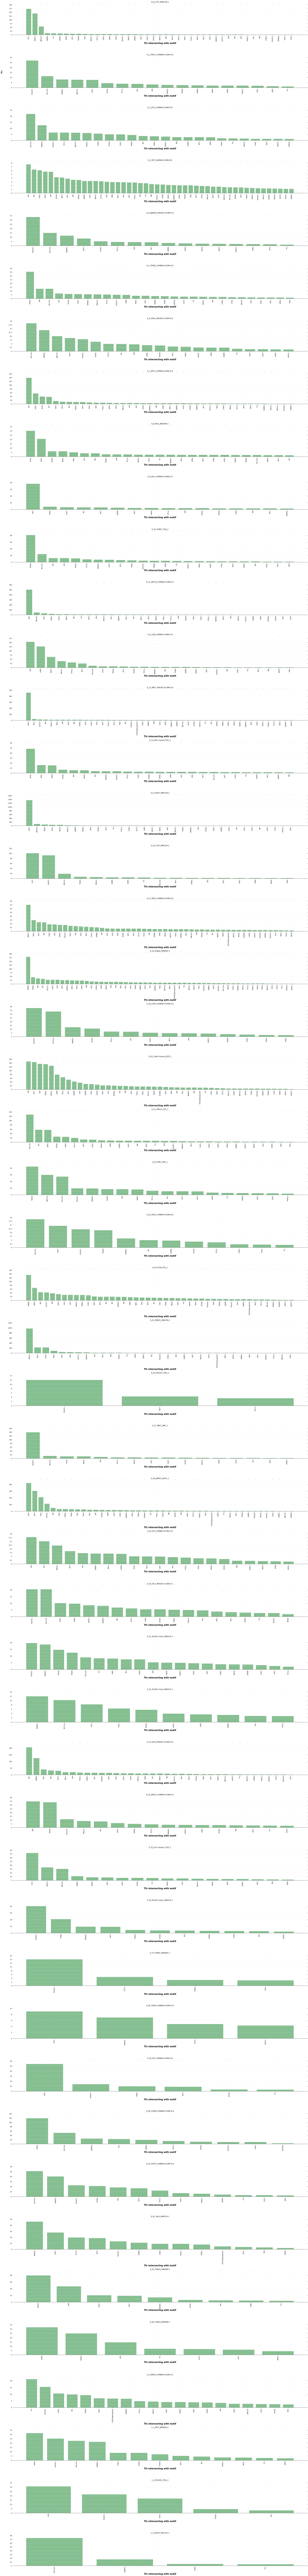

In [22]:
fig, axs = plt.subplots(len(unique_motifs),figsize=(30,250))
from matplotlib.ticker import StrMethodFormatter


for i in range(len(unique_motifs)):
    print(unique_motifs[i])
    p_adjusted = multipletests(motif_chip_pval_matrix[i,:], method='fdr_bh')
    idxs = np.argsort(odds_ratio[i,np.array(p_adjusted[0])])[::-1]
 
    ax = axs[i]
    tfs = np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs]
    counts = odds_ratio[i,np.array(p_adjusted[0])][idxs]
    ax.bar(tfs, counts,color="#86bf91")
    ax.set_xticks(tfs,rotation='vertical')

    #ax.set_ylabel('odds ratio')
    #ax.set_ylabel('TFs significantly co-occuring with motif')

    ax.set_title(unique_motifs[i])

    print(np.array(uniq_tfs)[np.array(p_adjusted[0])][idxs][0:5])
    #print(odds_ratio[i,np.array(p_adjusted[0])][idxs][-5:])
    
for i,x in enumerate(axs):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Tfs intersecting with motif", weight='bold', size=15)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("TFs", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=90)
#plt.show()
plt.savefig(mode+"_histplot.pdf")

plt.tight_layout()

In [19]:
motif_chip_pval_matrix[1,:]

array([1.00000000e+000, 2.96439388e-323, 9.99999896e-001, 9.99999738e-001,
       4.58868923e-115, 1.00000000e+000, 2.96439388e-323, 1.00000000e+000,
       1.39497093e-135, 9.99999961e-001, 9.99999956e-001, 2.96439388e-323,
       9.99999891e-001, 1.00000000e+000, 1.00000000e+000, 9.99999871e-001,
       1.00000000e+000, 1.00000000e+000, 9.99999922e-001, 9.99999929e-001,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 9.86338400e-001,
       1.00000000e+000, 1.00000000e+000, 9.99999998e-001, 2.96439388e-323,
       1.00000000e+000, 2.96439388e-323, 1.85017272e-054, 1.00000000e+000,
       1.00000000e+000, 2.96439388e-323, 2.96439388e-323, 1.00000000e+000,
       9.99999947e-001, 9.99999961e-001, 9.99999946e-001, 1.00000000e+000,
       1.82267559e-078, 1.00000000e+000, 9.99999826e-001, 2.96439388e-323,
       1.00000000e+000, 1.00000000e+000, 2.96439388e-323, 9.99999995e-001,
       1.66016893e-011, 9.99999870e-001, 5.70497197e-296, 6.57592950e-177,
       1.01698860e-002, 1

In [20]:
unique_motifs

['0_0_CTCF_MA0139.1',
 '0_1_PO5F1_HUMAN.H11MO.0.A',
 '0_2_ZIC3_HUMAN.H11MO.0.B',
 '0_3_SP3_HUMAN.H11MO.0.B',
 '0_4_NANOG_MOUSE.H11MO.0.A',
 '0_5_TEAD1_HUMAN.H11MO.0.A',
 '0_6_SOX2_MOUSE.H11MO.0.A',
 '0_7_NFYC_HUMAN.H11MO.0.A',
 '0_8_Rfx1_MA0509.1',
 '0_9_SIX1_HUMAN.H11MO.0.A',
 '0_10_TEAD1_TEA_2',
 '0_11_ZNF76_HUMAN.H11MO.0.C',
 '0_12_JUN_HUMAN.H11MO.0.A',
 '0_13_NRF1_MOUSE.H11MO.0.A',
 '0_14_Rfx2.mouse_RFX_2',
 '0_15_REST_MA0138.2',
 '0_16_CTCF_MA0139.1',
 '0_17_MXI1_HUMAN.H11MO.0.A',
 '0_18_Gabpa_MA0062.2',
 '0_19_COE1_HUMAN.H11MO.0.A',
 '0_20_Creb5.mouse_bZIP_1',
 '0_21_GRHL1_CP2_1',
 '0_22_EBF1_EBF_1',
 '0_23_SOX2_HUMAN.H11MO.0.A',
 '0_24_ETV6_ETS_1',
 '0_25_ZBED1_MA0749.1',
 '0_26_POU2F2_POU_2',
 '0_27_NRF1_NRF_1',
 '0_28_ARNTL_bHLH_1',
 '0_29_SP1_HUMAN.H11MO.0.A',
 '0_30_ZIC2_MOUSE.H11MO.0.C',
 '0_31_Pou5f1+Sox2_MA0142.1',
 '0_32_Pou5f1+Sox2_MA0142.1',
 '0_33_E2F4_MOUSE.H11MO.0.A',
 '0_34_ZN547_HUMAN.H11MO.0.C',
 '0_35_Hic1.mouse_C2H2_1',
 '0_36_Pou5f1+Sox2_MA0142.1',
 '0_37_FOXB

In [21]:
# data={}
# data["pval"] = motif_chip_pval_matrix
# data["odds"] = odds_ratio
# data["motif_names"] = unique_motifs
# data["tf_names"] = uniq_tfs

# import pickle as pkl
# ft = open("saving_pvals.pkl","wb")
# pkl.dump(data,ft)